# Problem 2

### Ordinary least squares

In [15]:
from scipy.io import loadmat
wine = loadmat('wine.mat')
import numpy as np

X = wine['data'].astype('float')
Y = wine['labels']
T = wine['testdata'].astype('float')
TY = wine['testlabels']

Beta = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
print np.sum(X.T.dot(X).dot(Beta) - X.T.dot(Y)), "(if aprox. 0 then solution satisfies normal equations)"

print "training risk of OLS:", np.sum((X.dot(Beta) - Y)**2)/float(len(X))
print "test risk of OLS:", np.sum((T.dot(Beta) - TY)**2)/float(len(T))

5.68434188608e-14 (if aprox. 0 then solution satisfies normal equations)
training risk of OLS: 0.542140952004
test risk of OLS: 0.539783718453


### Sparse linear predictor

training risk of Sparse Linear Predictor= 0.558774530525
test risk of Sparse Linear Predictor: 0.556545599129
indexes of chosen coefficient vector: (0, 2, 10, 11)
values of chosen coefficient vector: ( 5.82610033857 -0.244742641118 0.108471215503 0.373626021271 )
value of Bo_hat = 5.82610033857 (intercept)


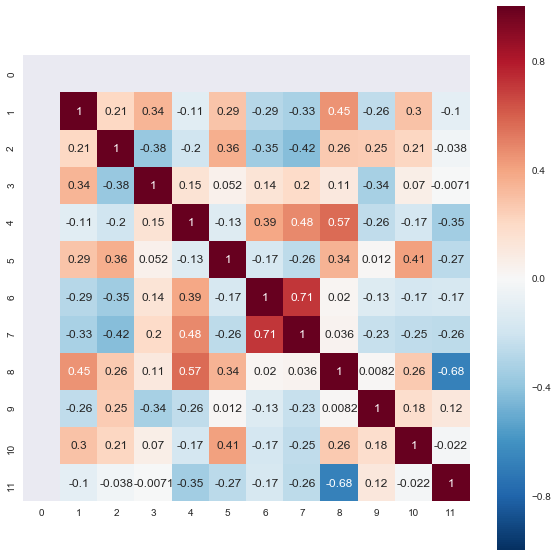

corr. volatile acidity [2] / total sulfur dioxide [7]: -0.422007273632
corr. volatile acidity [2] / citric acid [3]: -0.375563020969
corr. sulphates [10] / chlorides [5]: 0.407115215006
corr. sulphates [10] / fixed acidity [1]: 0.296863227622
corr. alcohol [11] / density [8]: -0.679593495912
corr. alcohol [11] / residual sugar [4]: -0.346262430229


In [16]:
min_err = 100
from itertools import combinations
for triple in combinations(range(12), 4):
    X3 = X[:, (triple)]
    Beta = np.linalg.solve(X3.T.dot(X3), X3.T.dot(Y))
    if min_err > np.sum((X3.dot(Beta) - Y)**2)/float(len(X3)):
        min_err = np.sum((X3.dot(Beta) - Y)**2)/float(len(X3))
        min_triple = triple
        min_Beta = Beta
print "training risk of Sparse Linear Predictor=", min_err

#the following lines create a full 12 vector Beta, adding [0] to all other non-chosen coeficients: 
Full_Beta = []
j = 0
for i in range(12):
    if i in min_triple:
        Full_Beta.append(min_Beta[j])
        j = j + 1
    else:
        Full_Beta.append([0])

print "test risk of Sparse Linear Predictor:", np.sum((T.dot(Full_Beta) - TY)**2)/float(len(T)) 
print "indexes of chosen coefficient vector:", min_triple
print "values of chosen coefficient vector: (", min_Beta[0][0], min_Beta[1][0], min_Beta[2][0], min_Beta[3][0],")"  
if 0 in min_triple:
    print "value of Bo_hat =", min_Beta[0][0], "(intercept)"
else:
    print "value of Bo_hat = 0"

#the following lines print a heat map of correlation coefficients based on test data:
import matplotlib.pyplot as plt
import seaborn as sns
corr = np.corrcoef(T, rowvar=False)
fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True)
#sns.heatmap(corr,vmax=1,square=True,annot=True, cmap='Blues')
plt.show()
print "corr. volatile acidity [2] / total sulfur dioxide [7]:", corr[2][7]
print "corr. volatile acidity [2] / citric acid [3]:", corr[2][3] 
print "corr. sulphates [10] / chlorides [5]:", corr[10][5] 
print "corr. sulphates [10] / fixed acidity [1]:", corr[10][1] 
print "corr. alcohol [11] / density [8]:", corr[11][8] 
print "corr. alcohol [11] / residual sugar [4]:", corr[11][4] 